In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('6 class.csv')
df.head(10)

Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  \
0             3068          0.002400        0.1700                   16.12   
1             3042          0.000500        0.1542                   16.60   
2             2600          0.000300        0.1020                   18.70   
3             2800          0.000200        0.1600                   16.65   
4             1939          0.000138        0.1030                   20.06   
5             2840          0.000650        0.1100                   16.98   
6             2637          0.000730        0.1270                   17.22   
7             2600          0.000400        0.0960                   17.40   
8             2650          0.000690        0.1100                   17.45   
9             2700          0.000180        0.1300                   16.05   

   Star type Star color Spectral Class  
0          0        Red              M  
1          0        Red              M  
2          0        Red              M  
3          0        Red              M  
4          0        Red              M  
5          0        Red              M  
6          0        Red              M  
7          0        Red              M  
8          0        Red              M  
9          0        Red              M

In [6]:
df.describe()

Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  \
count       240.000000        240.000000    240.000000   
mean      10497.462500     107188.361635    237.157781   
std        9552.425037     179432.244940    517.155763   
min        1939.000000          0.000080      0.008400   
25%        3344.250000          0.000865      0.102750   
50%        5776.000000          0.070500      0.762500   
75%       15055.500000     198050.000000     42.750000   
max       40000.000000     849420.000000   1948.500000   

       Absolute magnitude(Mv)   Star type  
count              240.000000  240.000000  
mean                 4.382396    2.500000  
std                 10.532512    1.711394  
min                -11.920000    0.000000  
25%                 -6.232500    1.000000  
50%                  8.313000    2.500000  
75%                 13.697500    4.000000  
max                 20.060000    5.000000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.3+ KB


In [8]:
df.isnull().sum()

Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class            0
dtype: int64

In [9]:
from scipy.stats import chi2_contingency, f_oneway
alpha = 0.05

contingency_color = pd.crosstab(df['Star type'], df['Star color'])
chi2_color, p_color, _, _ = chi2_contingency(contingency_color)
print(f"Chi-Square Test for Star Color - p-value: {p_color}")

if p_color < alpha:
    print("Reject the null hypothesis: There is a relationship between Star Type and Star Color.")
else:
    print("Fail to reject the null hypothesis: No relationship between Star Type and Star Color.")

contingency_spectral = pd.crosstab(df['Star type'], df['Spectral Class'])
chi2_spectral, p_spectral, _, _ = chi2_contingency(contingency_spectral)
print(f"\nChi-Square Test for Spectral Class - p-value: {p_spectral}")

if p_spectral < alpha:
    print("Reject the null hypothesis: There is a relationship between Star Type and Spectral Class.")
else:
    print("Fail to reject the null hypothesis: No relationship between Star Type and Spectral Class.")


Chi-Square Test for Star Color - p-value: 1.0282167148811095e-50
Reject the null hypothesis: There is a relationship between Star Type and Star Color.

Chi-Square Test for Spectral Class - p-value: 6.3612785069297726e-52
Reject the null hypothesis: There is a relationship between Star Type and Spectral Class.


In [10]:
star_types = df['Star type'].unique()
print(star_types)
groups_radius = [df[df['Star type'] == star_type]['Radius(R/Ro)'] for star_type in star_types]
f_stat_radius, p_radius = f_oneway(*groups_radius)
print(f"ANOVA for Relative Radius - p-value: {p_radius}")

if p_radius < alpha:
    print("Reject the null hypothesis: The means of Relative Radius are different across Star Types.")
else:
    print("Fail to reject the null hypothesis: The means of Relative Radius are equal across Star Types.")

groups_magnitude = [df[df['Star type'] == star_type]['Absolute magnitude(Mv)'] for star_type in star_types]
f_stat_magnitude, p_magnitude = f_oneway(*groups_magnitude)
print(f"\nMagnitude:\nANOVA for Absolute Magnitude - p-value: {p_magnitude}")

if p_magnitude < alpha:
    print("Reject the null hypothesis: The means of Absolute Magnitude are different across Star Types.")
else:
    print("Fail to reject the null hypothesis: The means of Absolute Magnitude are equal across Star Types.")


groups_temp = [df[df['Star type'] == star_type]['Temperature (K)'] for star_type in star_types]
f_stat_temp, p_temp = f_oneway(*groups_temp)
print(f"\nTemperature :\nANOVA for Absolute Temperature - p-value: {p_temp}")

if p_temp < alpha:
    print("Reject the null hypothesis: The means of Absolute Temperature are different across Star Types.")
else:
    print("Fail to reject the null hypothesis: The means of Absolute Temperature are equal across Star Types.")

groups_lumnosity = [df[df['Star type'] == star_type]['Luminosity(L/Lo)'] for star_type in star_types]
f_stat_temp, p_temp = f_oneway(*groups_temp)
print(f"\nLuminosity :\nANOVA for Luminosity - p-value: {p_temp}")

if p_temp < alpha:
    print("Reject the null hypothesis: The means of Luminosity are different across Star Types.")
else:
    print("Fail to reject the null hypothesis: The means of Luminosity are equal across Star Types.")

[0 1 2 3 4 5]
ANOVA for Relative Radius - p-value: 6.384847537214598e-161
Reject the null hypothesis: The means of Relative Radius are different across Star Types.

Magnitude:
ANOVA for Absolute Magnitude - p-value: 2.1608088460391526e-175
Reject the null hypothesis: The means of Absolute Magnitude are different across Star Types.

Temperature :
ANOVA for Absolute Temperature - p-value: 3.989632637115045e-18
Reject the null hypothesis: The means of Absolute Temperature are different across Star Types.

Luminosity :
ANOVA for Luminosity - p-value: 3.989632637115045e-18
Reject the null hypothesis: The means of Luminosity are different across Star Types.


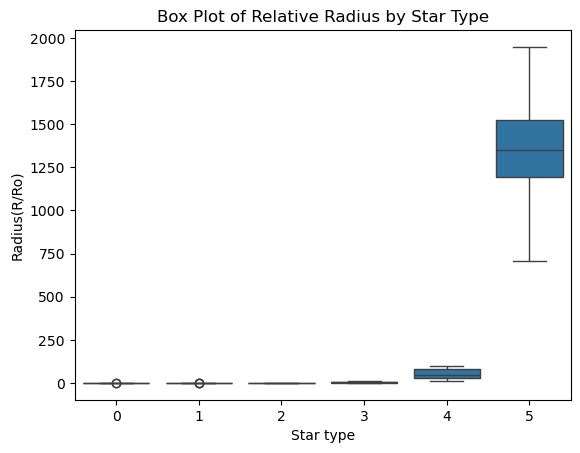

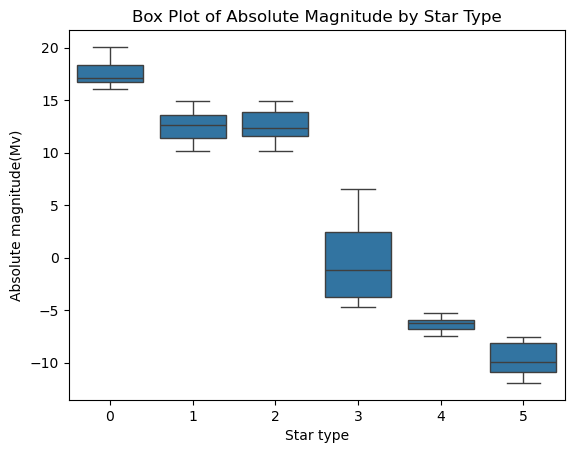

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Star type', y='Radius(R/Ro)', data=df)
plt.title('Box Plot of Relative Radius by Star Type')
plt.show()
sns.boxplot(x='Star type', y='Absolute magnitude(Mv)', data=df)
plt.title('Box Plot of Absolute Magnitude by Star Type')
plt.show()


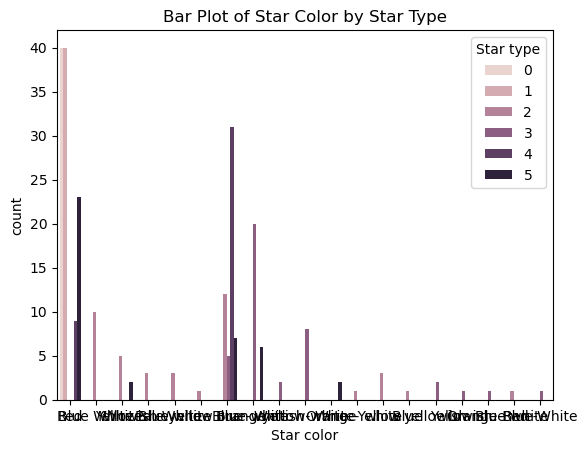

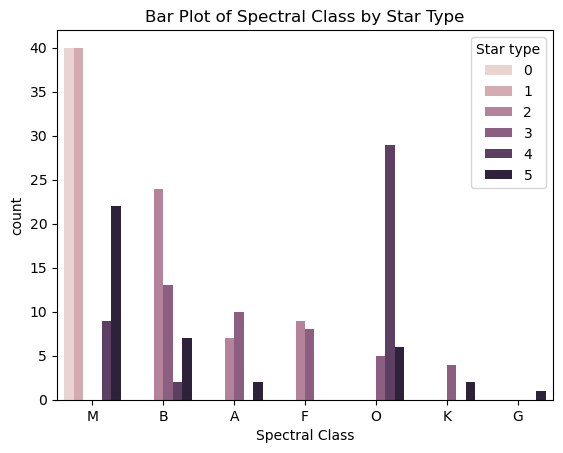

In [10]:
sns.countplot(x='Star color', hue='Star type', data=df)
plt.title('Bar Plot of Star Color by Star Type')
plt.show()
sns.countplot(x='Spectral Class', hue='Star type', data=df)
plt.title('Bar Plot of Spectral Class by Star Type')
plt.show()


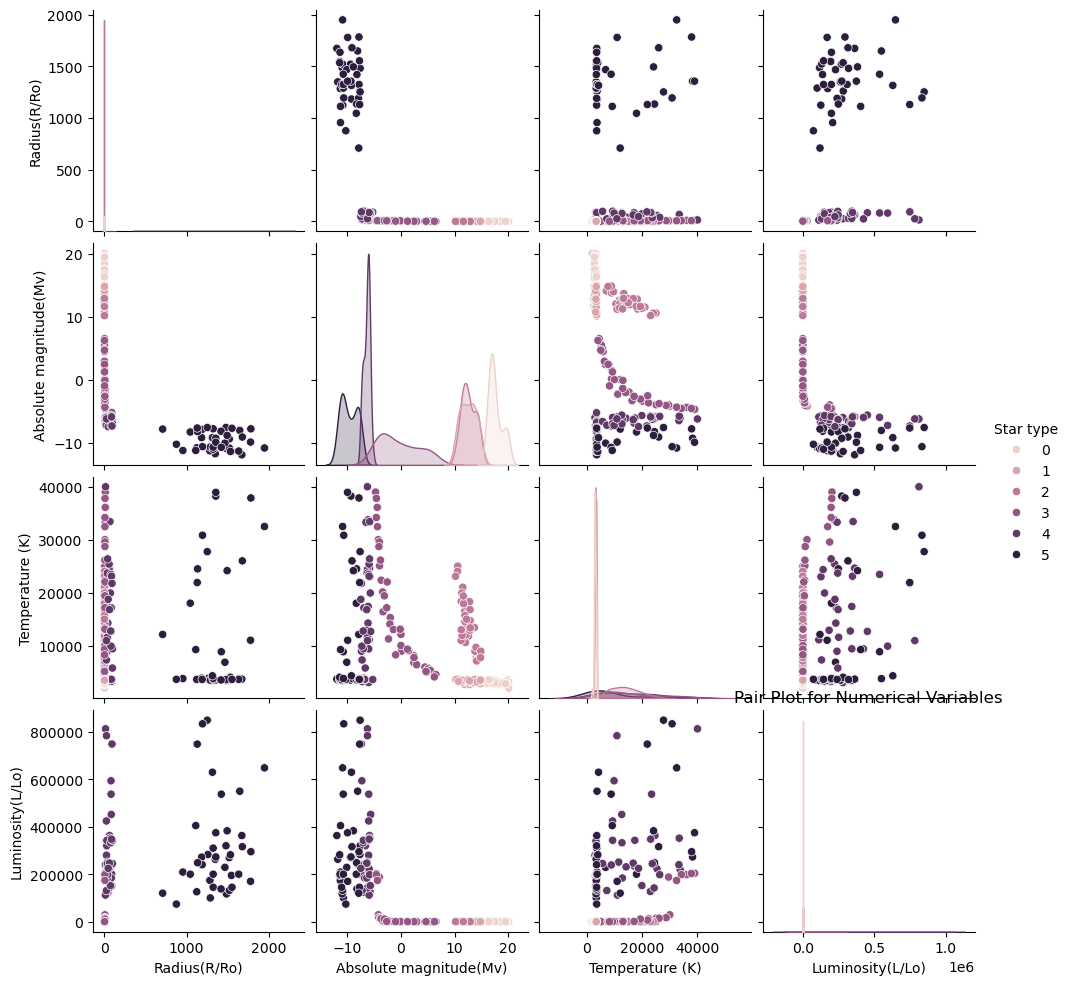

In [12]:
sns.pairplot(df, hue='Star type', vars=['Radius(R/Ro)', 'Absolute magnitude(Mv)', 'Temperature (K)','Luminosity(L/Lo)'])
plt.title('Pair Plot for Numerical Variables')
plt.show()

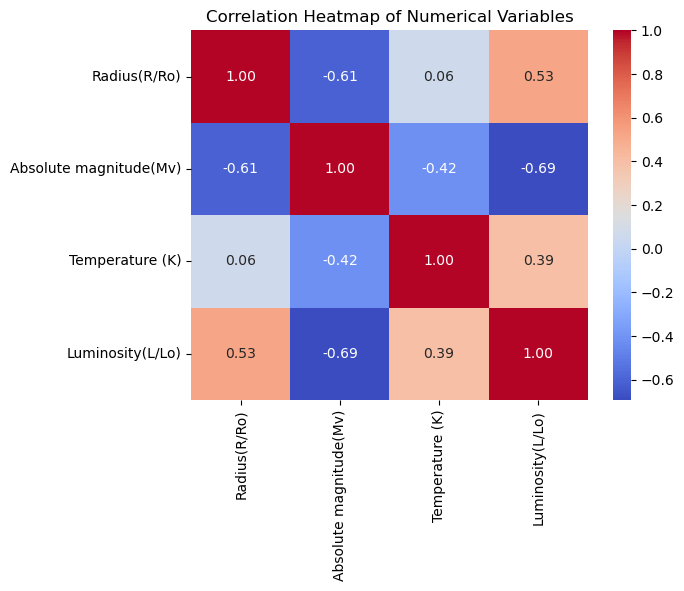

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df[['Radius(R/Ro)', 'Absolute magnitude(Mv)', 'Temperature (K)', 'Luminosity(L/Lo)']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


## Split 1 Trial

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


df_encoded = df.copy()
label_encoders = {}
for col in ['Star color', 'Spectral Class']:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le 
X = df_encoded[['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)', 'Star color', 'Spectral Class']]
y = df_encoded['Star type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training data: {X_train.shape}, Testing data: {X_test.shape}")


print("\nAccuracy of model at 20% split : 97.9167 ")

Training data: (192, 6), Testing data: (48, 6)

Accuracy of model at 20% split : 97.9167 


## Split 2 Trial

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


df_encoded = df.copy()
label_encoders = {}
for col in ['Star color', 'Spectral Class']:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le 
X = df_encoded[['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)', 'Star color', 'Spectral Class']]
y = df_encoded['Star type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(f"Training data: {X_train.shape}, Testing data: {X_test.shape}")


print("\nAccuracy of model at 25% split : 98.3333 ")

Training data: (180, 6), Testing data: (60, 6)

Accuracy of model at 25% split : 98.3333 


## Split 3 Trial

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


df_encoded = df.copy()
label_encoders = {}
for col in ['Star color', 'Spectral Class']:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le 
X = df_encoded[['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)', 'Star color', 'Spectral Class']]
y = df_encoded['Star type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Training data: {X_train.shape}, Testing data: {X_test.shape}")


print("\nAccuracy of model at 30% split : 98.6111 ")

Training data: (168, 6), Testing data: (72, 6)

Accuracy of model at 30% split : 98.6111 


## split 4 Trial

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


df_encoded = df.copy()
label_encoders = {}
for col in ['Star color', 'Spectral Class']:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le 
X = df_encoded[['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)', 'Star color', 'Spectral Class']]
y = df_encoded['Star type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)
print(f"Training data: {X_train.shape}, Testing data: {X_test.shape}")


print("\nAccuracy of model at 35% split : 98.8095 ")

Training data: (156, 6), Testing data: (84, 6)

Accuracy of model at 35% split : 98.8095 


## Split 5 Trial

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


df_encoded = df.copy()
label_encoders = {}
for col in ['Star color', 'Spectral Class']:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le 
X = df_encoded[['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)', 'Star color', 'Spectral Class']]
y = df_encoded['Star type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
print(f"Training data: {X_train.shape}, Testing data: {X_test.shape}")


print("\nAccuracy of model at 40% split: 98.9583 ")

Training data: (144, 6), Testing data: (96, 6)

Accuracy of model at 40% split: 98.9583 


## Best Split of Data is at 45%

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


df_encoded = df.copy()
label_encoders = {}
for col in ['Star color', 'Spectral Class']:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le 
X = df_encoded[['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)', 'Star color', 'Spectral Class']]
y = df['Star type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=42)
print(f"Training data: {X_train.shape}, Testing data: {X_test.shape}")


print("\nAccuracy of model at 45% split: 99.0741 ")

Training data: (132, 6), Testing data: (108, 6)

Accuracy of model at 45% split: 99.0741 


# Using a Hybrid Algorithm to CLassify between attrbutes and decide using Voiting
### 1)Random Forest Classifier (RF) â€“ A powerful ensemble method using multiple decision trees.
### 2)Logistic Regression (LR) with StandardScaler â€“ A simple yet effective linear classifier 

In [21]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline

rf = RandomForestClassifier(n_estimators=100, random_state=42)

lr = make_pipeline(StandardScaler(), LogisticRegression(max_iter=2000, solver='lbfgs', random_state=42))

voting_clf = VotingClassifier(estimators=[('rf', rf), ('lr', lr)], voting='hard')

voting_clf.fit(X_train, y_train)

y_pred = voting_clf.predict(X_test)

print(f"Accuracy: {(accuracy_score(y_test, y_pred)*100):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 99.0741
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.95      1.00      0.97        19
           2       1.00      1.00      1.00        19
           3       1.00      0.94      0.97        16
           4       1.00      1.00      1.00        17
           5       1.00      1.00      1.00        19

    accuracy                           0.99       108
   macro avg       0.99      0.99      0.99       108
weighted avg       0.99      0.99      0.99       108

Confusion Matrix:
 [[18  0  0  0  0  0]
 [ 0 19  0  0  0  0]
 [ 0  0 19  0  0  0]
 [ 0  1  0 15  0  0]
 [ 0  0  0  0 17  0]
 [ 0  0  0  0  0 19]]


In [22]:
import pickle
with open('voting_classifier_model.pkl', 'wb') as f:
    pickle.dump(voting_clf, f)

print("Model saved to 'voting_classifier_model.pkl'")

Model saved to 'voting_classifier_model.pkl'


## Using XGBoost Classifier

In [24]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_clf.fit(X_train, y_train)

y_pred_xgb = xgb_clf.predict(X_test)

print("\nðŸ”¹ XGBoost Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb) * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


ðŸ”¹ XGBoost Model Evaluation:
Accuracy: 99.07%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.95      1.00      0.97        19
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00        16
           4       1.00      1.00      1.00        17
           5       1.00      1.00      1.00        19

    accuracy                           0.99       108
   macro avg       0.99      0.99      0.99       108
weighted avg       0.99      0.99      0.99       108

Confusion Matrix:
 [[17  1  0  0  0  0]
 [ 0 19  0  0  0  0]
 [ 0  0 19  0  0  0]
 [ 0  0  0 16  0  0]
 [ 0  0  0  0 17  0]
 [ 0  0  0  0  0 19]]


## Using K-Nearest Neighbors (KNN)

In [25]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=5, metric='euclidean')  # You can tune 'n_neighbors' for better performance
knn_clf.fit(X_train, y_train)

y_pred_knn = knn_clf.predict(X_test)

print("\nðŸ”¹ KNN Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn) * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))



ðŸ”¹ KNN Model Evaluation:
Accuracy: 56.48%
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.78      0.67        18
           1       0.69      0.47      0.56        19
           2       0.71      0.89      0.79        19
           3       0.71      0.31      0.43        16
           4       0.35      0.47      0.40        17
           5       0.47      0.42      0.44        19

    accuracy                           0.56       108
   macro avg       0.59      0.56      0.55       108
weighted avg       0.59      0.56      0.55       108

Confusion Matrix:
 [[14  4  0  0  0  0]
 [10  9  0  0  0  0]
 [ 0  0 17  2  0  0]
 [ 0  0  7  5  4  0]
 [ 0  0  0  0  8  9]
 [ 0  0  0  0 11  8]]


## Using Random Forest Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)

print("\nðŸ”¹ Random Forest Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf) * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


ðŸ”¹ Random Forest Model Evaluation:
Accuracy: 100.00%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00        16
           4       1.00      1.00      1.00        17
           5       1.00      1.00      1.00        19

    accuracy                           1.00       108
   macro avg       1.00      1.00      1.00       108
weighted avg       1.00      1.00      1.00       108

Confusion Matrix:
 [[18  0  0  0  0  0]
 [ 0 19  0  0  0  0]
 [ 0  0 19  0  0  0]
 [ 0  0  0 16  0  0]
 [ 0  0  0  0 17  0]
 [ 0  0  0  0  0 19]]


In [27]:
import pickle
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf_clf, f)

print("âœ… Random Forest model saved as 'random_forest_model.pkl'")


âœ… Random Forest model saved as 'random_forest_model.pkl'
